In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib
global df_pred,pred_all
from sklearn.externals import joblib

import sys
import warnings
pd.options.mode.chained_assignment = None 
from datetime import datetime


In [2]:
def predictor_mean(model0_1,modelo_2,X_set):  
    #aplicamos los predict
    forecast_q = model0_1.predict(X_set) 
    forecast = modelo_2.predict(X_set)
   #generamos una lista dummy: 
    forecast_mean = forecast 
    
    for i in range(len(X_set)):
        if  forecast[i] < 135:
            forecast_mean[i] = forecast[i]
        elif  forecast_q[i] > 160:
            forecast_mean[i] = forecast_q[i]
        if  130 < forecast_q[i] <155 and 130 < forecast[i] < 155:
            forecast_mean[i] = (0.3*forecast_q[i] + 0.7*forecast[i])
        if  140 < forecast_q[i] <160 and 140 < forecast[i] < 160:
            forecast_mean[i] = (forecast_q[i] + forecast[i])/2
    return forecast_mean

In [3]:
dirección_modelos = str("/DATA/paw/jupyterhub_notebook/daniel.bustillos/DanielBustillos/contaminación"+
                        "/pipeline-norberto/pipeline_pau/modelos/")
path_final = str("./datos/pronóstico_contaminación.csv")
path_inicial = "./datos/ingesta_modelos_"

In [4]:
target1 = "PM10mean_y_frcst_"
conta1 = 'PM10'
target2 = "O3_y_frcst_"
conta2 = 'O3'
target = "O3_y_frcst_"
conta = 'O3'

In [5]:
def prediccion(target,conta):

    #cargamos el DF
    df_predict = pd.read_csv(path_inicial + conta +'.csv')

    df_fechas = df_predict["fecha"]
    df_predict.drop(["fecha"],inplace=True,axis=1)

    
    #cargamos los modelos
    model = [0 for col in range(25)]
    modelq = [0 for col in range(25)]
    for i in range(0,24):
        model[i] = joblib.load(str(dirección_modelos + conta +'/' + conta+'_'+str(i+1)+'hora.pkl'))
        #modelq[i] = joblib.load(str(dirección_modelos + conta + '/' + conta+'_'+str(i+1)+'hora_quantile.pkl'))
        
    #hacemos el predict
    df_pronosticados = df_predict.copy()

    for i in range(0,24):
        df_pronosticados[target + str(i+1)] = model[i].predict(df_predict)
        
    pred = []
    for i in range(1,25):
        pred.append(df_pronosticados[str(target+str(i))].head(1).values[0])

    df_pronosticados["fecha"] = df_fechas

    ## predict de las últimas 12 horas
    df_predict_historico = df_pronosticados[["fecha",target+'12']].copy()

    
    if conta == "PM10":
        df_predict_historico["fecha"] = df_predict_historico["fecha"].shift(12)
    elif conta == "O3":
        df_predict_historico["fecha"] = df_predict_historico["fecha"].shift(12)
    else: print("ERROR")
        

    df_predict_historico = df_predict_historico[["fecha",target+'12']].dropna()#.iloc[12:,:]#.head(13)
    df_predict_historico.rename(columns={target+'12': conta+'_pron_a_12hrs'}, inplace=True)
    
    
    
    #predict 12 horas
    df_pred =  pd.DataFrame(columns=["pred_0"])
    for i in range(0,24):
        df_pred[str("pred_"+str(i))] = [pred[i]]

    for i in range(0,24):
        df_pred.loc[i,conta+'_pronóstico'] = df_pred.iloc[0,i]
    for i in range(0,24):
        df_pred.loc[i,'fecha'] = pd.date_range(df_fechas[0], periods=25, freq='H').tolist()[i+1]
        df_pred = df_pred[[conta+"_pronóstico","fecha"]]
            
    if conta == "PM10":
        df_predict = df_pronosticados[["fecha","PM10mean_mean","PM10_max","PM10_mean","PM10mean_max"]]
    elif conta == "O3":
        df_predict = df_pronosticados[["fecha",'TMP_min','TMP_max',
                                            'O3_max','O3_mean','O3_min','TMP_mean']]
    else: print("ERROR")
        
        
    df_pred['fecha'] = df_pred['fecha'].astype(str)
    
    
    return  df_predict_historico,df_predict,df_pred

Ejecutamos la función:

In [6]:
df_predict_historico_O3,df_predict_O3,df_pred_O3  = prediccion(target2,conta2)

[22:25:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

ValueError: feature_names mismatch: ['NOX_7.0_mean', 'O3_48.0_mean', 'O3_max', 'TMP_24.0_mean', 'O3_45.0_max', 'O3_25.0_max', 'O3_22.0_max', 'O3_21.0_min', 'O3_24.0_min', 'RH_min', 'O3_2.0_min', 'RH_24.0_min', 'RH_22.0_max', 'RH_0.0_mean', 'TMP_23.0_mean', 'TMP_2.0_max', 'TMP_1.0_max', 'WSP_mean', 'RH_44.0_min', 'hora_20.0_mean', 'hora_11.0_min', 'TMP_47.0_max', 'hora_10.0_min', 'O3_1.0_max', 'RH_1.0_max', 'RH_47.0_max', 'TMP_0.0_min', 'TMP_max', 'RH_1.0_mean', 'O3_23.0_min', 'RH_46.0_mean', 'RH_23.0_min', 'TMP_1.0_min', 'TMP_2.0_min', 'O3_25.0_min', 'O3_46.0_min', 'hora_9.0_mean', 'hora_35.0_mean', 'TMP_1.0_mean', 'NO_8.0_mean', 'O3_0.0_mean', 'O3_2.0_mean', 'RH_26.0_mean', 'NOX_7.0_max', 'RH_max', 'RH_24.0_mean', 'TMP_48.0_mean', 'hora_43.0_mean', 'O3_46.0_max', 'O3_21.0_max', 'RH_23.0_max', 'TMP_45.0_max', 'RH_46.0_min', 'RH_25.0_max', 'RH_23.0_mean', 'O3_0.0_min', 'O3_1.0_mean', 'O3_25.0_mean', 'TMP_0.0_max', 'hora_12.0_mean', 'O3_2.0_max', 'RH_22.0_mean', 'hora_44.0_mean', 'RH_21.0_max', 'O3_22.0_mean', 'TMP_21.0_mean', 'hora_10.0_max', 'hora_10.0', 'O3_20.0_max', 'RH_25.0_mean', 'O3_24.0_mean', 'RH_45.0_min', 'RH_45.0_max', 'PM2.5_3.0_mean', 'RH_2.0_mean', 'NOX_8.0_mean', 'RH_48.0_mean', 'O3_min', 'TMP_46.0_mean', 'RH_mean', 'O3_3.0_max', 'hora_11.0_mean', 'O3_44.0_max', 'RH_24.0_max', 'O3_26.0_mean', 'NO_7.0_mean', 'RH_21.0_mean', 'NOX_8.0_max', 'O3_45.0_mean', 'TMP_min', 'RH_47.0_mean', 'TMP_25.0_mean', 'hora_19.0_mean', 'NO_8.0_max', 'RH_3.0_max', 'RH_47.0_min', 'hora_34.0_mean', 'O3_0.0_max', 'O3_3.0_mean', 'O3_47.0_mean', 'RH_45.0_mean', 'RH_0.0_max', 'hora_9.0_max', 'O3_47.0_min', 'O3_24.0_max', 'TMP_25.0_max', 'O3_44.0_mean', 'TMP_21.0_max', 'RH_1.0_min', 'hora_21.0_mean', 'O3_22.0_min', 'TMP_mean', 'TMP_47.0_mean', 'RH_48.0_max', 'O3_23.0_mean', 'O3_21.0_mean', 'NO_7.0_max', 'O3_1.0_min', 'TMP_24.0_max', 'TMP_23.0_min', 'TMP_46.0_max', 'RH_21.0_min', 'TMP_45.0_mean', 'RH_0.0_min', 'O3_45.0_min', 'RH_44.0_mean', 'TMP_0.0_mean', 'RH_22.0_min', 'RH_2.0_max', 'RH_25.0_min', 'O3_mean', 'NOX_6.0_mean', 'TMP_2.0_mean', 'TMP_23.0_max', 'RH_26.0_max', 'O3_46.0_mean', 'O3_23.0_max', 'O3_47.0_max', 'RH_46.0_max', 'RH_2.0_min', 'hora_33.0_mean', 'TMP_22.0_mean', 'TMP_22.0_max', 'RH_mean_frcst_1', 'RH_mean_frcst_2', 'RH_mean_frcst_3', 'RH_mean_frcst_4', 'RH_mean_frcst_5', 'RH_mean_frcst_6', 'RH_mean_frcst_7', 'RH_mean_frcst_8', 'RH_mean_frcst_9', 'RH_mean_frcst_10', 'RH_mean_frcst_11', 'RH_mean_frcst_12', 'RH_mean_frcst_13', 'RH_mean_frcst_14', 'RH_mean_frcst_15', 'RH_mean_frcst_16', 'RH_mean_frcst_17', 'RH_mean_frcst_18', 'RH_mean_frcst_19', 'RH_mean_frcst_20', 'RH_mean_frcst_21', 'RH_mean_frcst_22', 'RH_mean_frcst_23', 'RH_mean_frcst_24', 'WSP_mean_frcst_1', 'WSP_mean_frcst_2', 'WSP_mean_frcst_3', 'WSP_mean_frcst_4', 'WSP_mean_frcst_5', 'WSP_mean_frcst_6', 'WSP_mean_frcst_7', 'WSP_mean_frcst_8', 'WSP_mean_frcst_9', 'WSP_mean_frcst_10', 'WSP_mean_frcst_11', 'WSP_mean_frcst_12', 'WSP_mean_frcst_13', 'WSP_mean_frcst_14', 'WSP_mean_frcst_15', 'WSP_mean_frcst_16', 'WSP_mean_frcst_17', 'WSP_mean_frcst_18', 'WSP_mean_frcst_19', 'WSP_mean_frcst_20', 'WSP_mean_frcst_21', 'WSP_mean_frcst_22', 'WSP_mean_frcst_23', 'WSP_mean_frcst_24', 'TMP_mean_frcst_1', 'TMP_mean_frcst_2', 'TMP_mean_frcst_3', 'TMP_mean_frcst_4', 'TMP_mean_frcst_5', 'TMP_mean_frcst_6', 'TMP_mean_frcst_7', 'TMP_mean_frcst_8', 'TMP_mean_frcst_9', 'TMP_mean_frcst_10', 'TMP_mean_frcst_11', 'TMP_mean_frcst_12', 'TMP_mean_frcst_13', 'TMP_mean_frcst_14', 'TMP_mean_frcst_15', 'TMP_mean_frcst_16', 'TMP_mean_frcst_17', 'TMP_mean_frcst_18', 'TMP_mean_frcst_19', 'TMP_mean_frcst_20', 'TMP_mean_frcst_21', 'TMP_mean_frcst_22', 'TMP_mean_frcst_23', 'TMP_mean_frcst_24'] ['hora_44.0_mean', 'RH_22.0_max', 'RH_1.0_mean', 'hora_20.0_mean', 'RH_46.0_max', 'hora_10.0_min', 'O3_46.0_mean', 'RH_max', 'O3_21.0_min', 'O3_min', 'O3_25.0_min', 'TMP_46.0_max', 'O3_3.0_mean', 'RH_24.0_mean', 'O3_1.0_mean', 'O3_22.0_max', 'TMP_mean', 'hora_11.0_mean', 'RH_24.0_min', 'O3_48.0_mean', 'RH_24.0_max', 'TMP_47.0_max', 'TMP_46.0_mean', 'RH_1.0_max', 'O3_23.0_max', 'O3_24.0_min', 'O3_mean', 'RH_mean', 'O3_2.0_mean', 'O3_45.0_mean', 'TMP_23.0_max', 'TMP_0.0_max', 'RH_47.0_mean', 'NOX_7.0_max', 'TMP_45.0_mean', 'TMP_21.0_max', 'RH_1.0_min', 'O3_47.0_max', 'O3_47.0_min', 'TMP_0.0_mean', 'PM2.5_3.0_mean', 'TMP_0.0_min', 'hora_11.0_min', 'hora_19.0_mean', 'TMP_24.0_max', 'TMP_23.0_mean', 'RH_25.0_mean', 'TMP_1.0_max', 'O3_47.0_mean', 'NOX_8.0_mean', 'hora_10.0_max', 'RH_3.0_max', 'O3_26.0_mean', 'hora_35.0_mean', 'O3_21.0_mean', 'TMP_1.0_mean', 'RH_45.0_min', 'hora_34.0_mean', 'O3_3.0_max', 'RH_47.0_max', 'O3_46.0_max', 'RH_0.0_max', 'TMP_min', 'O3_45.0_min', 'TMP_2.0_mean', 'RH_45.0_mean', 'TMP_22.0_mean', 'O3_25.0_max', 'TMP_2.0_min', 'hora_43.0_mean', 'NOX_7.0_mean', 'O3_45.0_max', 'TMP_45.0_max', 'O3_max', 'RH_2.0_min', 'RH_45.0_max', 'RH_46.0_mean', 'O3_24.0_max', 'O3_20.0_max', 'hora_12.0_mean', 'O3_1.0_min', 'RH_min', 'NO_8.0_max', 'O3_0.0_mean', 'O3_23.0_mean', 'RH_23.0_min', 'O3_25.0_mean', 'O3_24.0_mean', 'RH_0.0_min', 'RH_26.0_mean', 'TMP_max', 'TMP_47.0_mean', 'TMP_25.0_max', 'O3_22.0_mean', 'O3_23.0_min', 'TMP_25.0_mean', 'hora_21.0_mean', 'hora_9.0_max', 'RH_23.0_mean', 'O3_2.0_max', 'RH_25.0_max', 'RH_26.0_max', 'O3_0.0_max', 'NOX_6.0_mean', 'RH_48.0_mean', 'hora_10.0', 'TMP_22.0_max', 'RH_21.0_mean', 'hora_33.0_mean', 'O3_1.0_max', 'RH_44.0_min', 'RH_47.0_min', 'NO_7.0_max', 'RH_21.0_min', 'TMP_23.0_min', 'O3_46.0_min', 'RH_44.0_mean', 'RH_0.0_mean', 'NOX_8.0_max', 'O3_44.0_mean', 'TMP_21.0_mean', 'RH_22.0_mean', 'RH_21.0_max', 'RH_23.0_max', 'RH_2.0_mean', 'O3_21.0_max', 'NO_7.0_mean', 'RH_48.0_max', 'RH_46.0_min', 'RH_2.0_max', 'NO_8.0_mean', 'TMP_2.0_max', 'RH_22.0_min', 'TMP_1.0_min', 'O3_22.0_min', 'TMP_48.0_mean', 'TMP_24.0_mean', 'O3_44.0_max', 'O3_2.0_min', 'hora_9.0_mean', 'RH_25.0_min', 'O3_0.0_min', 'RH_mean_frcst_1', 'RH_mean_frcst_2', 'RH_mean_frcst_3', 'RH_mean_frcst_21', 'RH_mean_frcst_22', 'RH_mean_frcst_23', 'RH_mean_frcst_24', 'WSP_mean_frcst_2', 'WSP_mean_frcst_3', 'WSP_mean_frcst_13', 'WSP_mean_frcst_14', 'WSP_mean_frcst_15', 'WSP_mean_frcst_16', 'TMP_mean_frcst_1', 'TMP_mean_frcst_2', 'TMP_mean_frcst_3', 'TMP_mean_frcst_21', 'TMP_mean_frcst_22', 'TMP_mean_frcst_23', 'TMP_mean_frcst_24']
expected RH_mean_frcst_12, TMP_mean_frcst_11, RH_mean_frcst_4, WSP_mean_frcst_6, WSP_mean_frcst_4, TMP_mean_frcst_18, TMP_mean_frcst_20, WSP_mean_frcst_24, WSP_mean_frcst_19, TMP_mean_frcst_16, WSP_mean_frcst_8, RH_mean_frcst_14, WSP_mean_frcst_9, WSP_mean, RH_mean_frcst_20, TMP_mean_frcst_13, TMP_mean_frcst_7, WSP_mean_frcst_10, WSP_mean_frcst_17, WSP_mean_frcst_5, TMP_mean_frcst_6, WSP_mean_frcst_20, WSP_mean_frcst_23, TMP_mean_frcst_12, TMP_mean_frcst_9, TMP_mean_frcst_15, WSP_mean_frcst_12, TMP_mean_frcst_10, WSP_mean_frcst_11, RH_mean_frcst_19, RH_mean_frcst_16, RH_mean_frcst_7, RH_mean_frcst_10, WSP_mean_frcst_21, RH_mean_frcst_13, TMP_mean_frcst_17, TMP_mean_frcst_8, RH_mean_frcst_17, WSP_mean_frcst_22, WSP_mean_frcst_18, RH_mean_frcst_8, RH_mean_frcst_9, TMP_mean_frcst_5, RH_mean_frcst_18, WSP_mean_frcst_1, TMP_mean_frcst_19, RH_mean_frcst_15, TMP_mean_frcst_4, RH_mean_frcst_5, TMP_mean_frcst_14, WSP_mean_frcst_7, RH_mean_frcst_6, RH_mean_frcst_11 in input data

In [9]:
df_predict_historico_PM10,df_predict_PM10,df_pred_PM10 = prediccion(target1,conta1)

[22:25:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [10]:
df_export = pd.concat([df_predict_O3.set_index('fecha'),df_predict_PM10.set_index('fecha')], axis=1, join='inner').reset_index()

NameError: name 'df_predict_O3' is not defined

Juntamos los 3 archivos generados: historico, pronóstico 

In [7]:
df_pron_hist = pd.concat([df_predict_historico_O3.set_index('fecha'),df_predict_historico_PM10.set_index('fecha')], axis=1, join='inner').reset_index()

NameError: name 'df_predict_historico_O3' is not defined

Juntamos los archivos de pronostico historico y el anterior

In [8]:
df_export = pd.merge(df_pron_hist, df_export, on='fecha',how="inner")

NameError: name 'df_pron_hist' is not defined

contatenamos el pronóstico de O3 y PM10

In [11]:
df_pronosticados = pd.concat([df_pred_O3.set_index('fecha'),df_pred_PM10.set_index('fecha')], axis=1, join='inner').reset_index()

Juntamos los archivos

In [12]:
df_export = pd.merge(df_pronosticados, df_export, on='fecha',how="outer")

#### exportamos

In [13]:
df_export.to_csv(path_final,sep=',', encoding='utf-8',index=False)

In [67]:
#pip3 install psycopg2-binary
import psycopg2
import pandas
postgresql_variable={
              'user':'aire',
          'password':'aire_EpN12*',
          'host':'207.249.120.21',
          'port':'8002',
          'database':'airedb'
    }
postgresql_db_config = {
          'user':postgresql_variable['user'],
          'password':postgresql_variable['password'],
          'host':postgresql_variable['host'],
          'port':postgresql_variable['port'],
          'database':postgresql_variable['database']
        }
connection = psycopg2.connect(**postgresql_db_config)
cursor = connection.cursor()   
query_table="""select * from aire_prediccion"""
cursor.execute(query_table)
df = pd.DataFrame(cursor.fetchall())
df.columns = pd.DataFrame(cursor.description).iloc[::,0].str.get(0).tolist()
cursor.close()
connection.close()

In [70]:
df.head(1)

,fecha,o3_pronóstico,pm10_pronóstico,o3_pron_a_12hrs,pm10_pron_a_12hrs,tmp_min,tmp_max,o3_max,o3_mean,o3_min,tmp_mean,pm10mean_mean,pm10_max,pm10_mean,pm10mean_max
0,2019-08-23 17:00:00,55.356831,53.742924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
if df_export.empty == False:
    import psycopg2

    def postgresql_insert_1(data,target_cursor):    
        oracle_insert_1="""
        INSERT INTO PUBLIC.aire_prediccion VALUES 
        """
        n = data.shape[1] #numero de columnas
        cadenaTipo = "("+"%s,"*n + ")"
        cadenaTipo = cadenaTipo.replace(",)",")")
        data.iloc[::,::] = data.fillna('NULL')
        data = data.values.tolist()
        dataText = b','.join(target_cursor.mogrify(cadenaTipo, row) for row in data).decode()    
        dataText = dataText.replace("'NULL'","NULL")
        target_cursor.execute(oracle_insert_1+dataText)
    
    postgresql_variable={
              'user':'aire',
          'password':'aire_EpN12*',
          'host':'207.249.120.21',
          'port':'8002',
          'database':'airedb'
    }
    postgresql_db_config = {
          'user':postgresql_variable['user'],
          'password':postgresql_variable['password'],
          'host':postgresql_variable['host'],
          'port':postgresql_variable['port'],
          'database':postgresql_variable['database']
        }
    connection = psycopg2.connect(**postgresql_db_config)
    cursor = connection.cursor()   
    delete_table="""delete from public.aire_prediccion"""
    cursor.execute(delete_table)
    postgresql_insert_1(df_export,cursor)
    connection.commit()
    cursor.close()
    connection.close()

In [14]:
df_export['fecha'] =  pd.to_datetime(df_export['fecha'], format='%Y-%m-%d %H:%M')
df_export.loc[23,"O3_pronóstico"] = df_export.loc[23,"O3_pron_a_12hrs"]
df_export.loc[23,"PM10_pronóstico"] = df_export.loc[23,"PM10_pron_a_12hrs"]
df_export.PM10_pronóstico = df_export.PM10_pronóstico

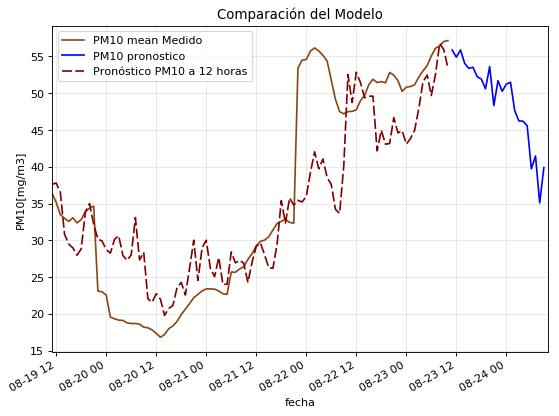

In [15]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca()

# df_export.tail(60).head(50).plot(x="fecha", y=[ "O3_y"],ax=ax,label=["O3 Medido"],color="dodgerblue")
# df_export.tail(60).head(100).plot(x="fecha", y=["O3_y_frcst_6"],ax=ax,label=["Pronóstico O3 a 12 horas"],color='darkblue',dashes=[6, 2])

df_export.head(120).plot(x="fecha", y=[ "PM10mean_max"],ax=ax,label=["PM10 mean Medido"],color="saddlebrown")
df_export.head(120).plot(x="fecha", y=[ "PM10_pronóstico"],ax=ax,label=["PM10 pronostico"],color="blue")
df_export.head(120).plot(x="fecha", y=["PM10_pron_a_12hrs"],ax=ax,label=["Pronóstico PM10 a 12 horas"],color='maroon',dashes=[6, 2])

plt.ylabel("PM10[mg/m3]")
plt.title("Comparación del Modelo")


# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.01)
ax.grid(which='major', alpha=0.3)

now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M").replace("/", "-")
plt.savefig('/home/paw/DanielBustillos/contaminación/imagenes/PM10_comparacion_'+str(dt_string)+'_.png'
            , bbox_inches='tight', dpi=400)

plt.legend()
plt.show()

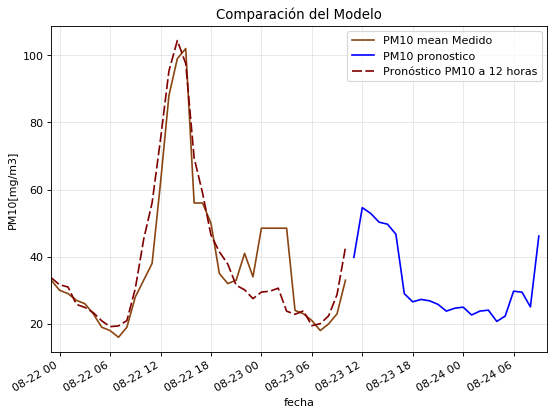

In [16]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca()

# df_export.(50).plot(x="fecha", y=[ "O3_y"],ax=ax,label=["O3 Medido"],color="dodgerblue")
# df_export.(60).head(100).plot(x="fecha", y=["O3_y_frcst_6"],ax=ax,label=["Pronóstico O3 a 12 horas"],color='darkblue',dashes=[6, 2])

df_export.head(60).plot(x="fecha", y=[ "O3_max"],ax=ax,label=["PM10 mean Medido"],color="saddlebrown")
df_export.head(60).plot(x="fecha", y=[ "O3_pronóstico"],ax=ax,label=["PM10 pronostico"],color="blue")
df_export.head(60).plot(x="fecha", y=["O3_pron_a_12hrs"],ax=ax,label=["Pronóstico PM10 a 12 horas"],color='maroon',dashes=[6, 2])

plt.ylabel("PM10[mg/m3]")
plt.title("Comparación del Modelo")


# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.01)
ax.grid(which='major', alpha=0.3)

now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M").replace("/", "-")
plt.savefig('/home/paw/DanielBustillos/contaminación/imagenes/PM10_comparacion_'+str(dt_string)+'_.png'
            , bbox_inches='tight', dpi=400)

plt.legend()
plt.show()

In [17]:
conta1

'PM10'

In [18]:
df_predict = pd.read_csv(path_inicial + conta1 +'.csv')

In [19]:
df_predict_O3 = pd.read_csv(path_inicial + conta +'.csv')

In [20]:
df_pronosticados.head()

,fecha,O3_pronóstico,PM10_pronóstico
0,2019-08-23 11:00:00,39.812733,55.890453
1,2019-08-23 12:00:00,54.613445,54.907532
2,2019-08-23 13:00:00,52.909248,55.896568
3,2019-08-23 14:00:00,50.283981,54.064053
4,2019-08-23 15:00:00,49.690083,53.394394


In [22]:
#df_pronosticados["O3_y_frcst_15"]